# Feature engineering for Indicators Data Module

This notebook generates features for the indicators data (see section ?? of the paper).

The **input** files for this notebook are:

- master list: should be located in the root folder;
- OHLC data for an asset (BTCUSDT in our case): should be located in the root folder. We splitted the data on the weekly basis and concatenated in one data frame while reading the data. We used 15m candlestick data.

The **output** files for this notebook are:

- features data frame: will be placed in the current folder.

<img align="left" width="678" height="344" src="../assets/indicators_module.png">

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import sys
sys.path.append('..')
import warnings
warnings.filterwarnings("ignore")

from feature_engineering import *
from utils import *

In [3]:
master_list = pd.read_csv('../master_list_v3_DBI.csv')
master_list['close_time'] = pd.to_datetime(master_list['close_time'])
master_list['target'].value_counts()

 0    1645
 1     568
-1     386
Name: target, dtype: int64

# Read the data

In [4]:
# Directory of 15m btcusdt data (splitted weekly)
files = os.listdir(f'../00_data/btcusdt/15m')
files = [f for f in files if f.split('.')[-1] == 'csv']

In [5]:
# GMT+4 time zone
df = pd.DataFrame()
for f in files:
    temp_df = pd.read_csv(f'../00_data/btcusdt/15m/{f}')
    df = pd.concat((df, temp_df))
    
df['open_time'] = pd.to_datetime(df['open_time'])
df['close_time'] = pd.to_datetime(df['close_time'])

df = df.sort_values('open_time').drop(columns=['Unnamed: 0', 'ignore'])

In [6]:
# Merge candlestick data with master list
df = df.merge(master_list, how='left', on='close_time')

# Feature engineering

In [7]:
features = feature_engineering_indicators(df)
features.to_csv('features.csv', index=False)

100%|█████████████████████████████████| 101034/101034 [01:18<00:00, 1287.60it/s]


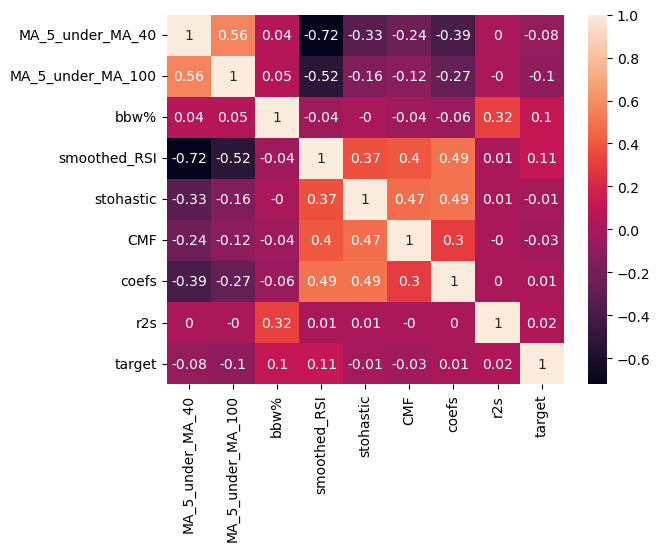

In [8]:
sns.heatmap(features.corr(numeric_only=True).round(2), annot=True)
plt.show()

# ROC-AUC

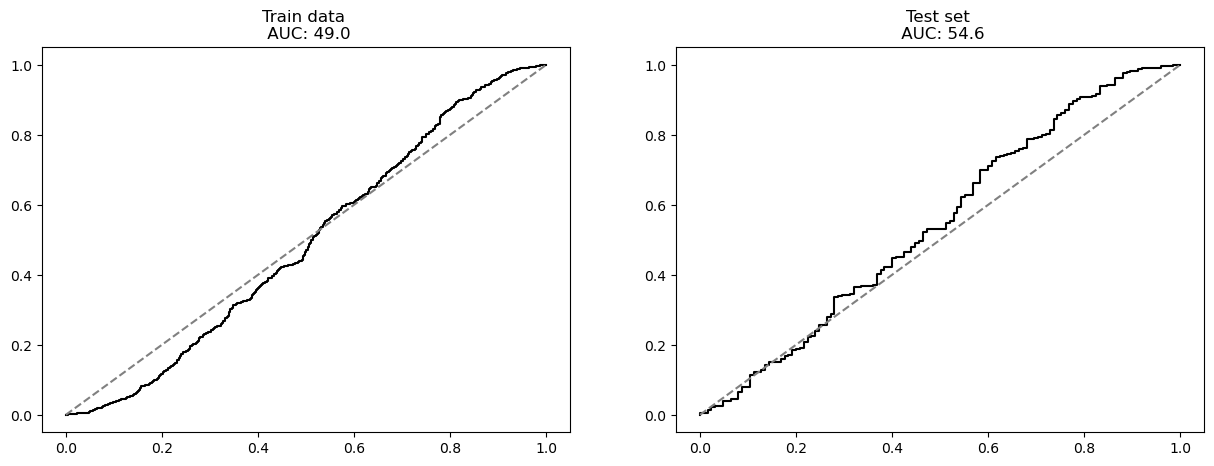

In [9]:
plot_roc_auc(features, 'smoothed_RSI')